# Detección de caras con Haar Cascades en OpenCV


##1. Introducción y teoría
¿Qué es la detección de objetos?
Es el proceso de encontrar y localizar automáticamente elementos de interés (como caras, autos, señales) en imágenes.
En este caso vamos a detectar rostros humanos usando una técnica clásica y rápida: las cascadas de Haar.

¿Por qué Haar Cascades?
Antes de que existieran las redes neuronales profundas, el algoritmo de Viola & Jones (2001) se volvió muy popular por ser rápido y eficiente.
Utiliza características simples llamadas “características de Haar” y un proceso en cascada para descartar rápidamente zonas que no tienen lo que buscamos.

### ¿Qué es Haar Cascade en OpenCV?

* **Haar Cascade** es un método clásico para detectar objetos (por ejemplo, caras) en imágenes.
* Se basa en buscar **patrones simples de luz y sombra** (llamados “características de Haar”) en diferentes zonas de la imagen.
* Es rápido y funciona bien para cosas simples como detectar caras de frente.

---

### ¿Cómo funciona?

1. **Convierte la imagen a escala de grises** (sólo intensidades).
2. **Escanea la imagen** usando una ventana que va probando en diferentes posiciones y tamaños.
3. En cada zona, **extrae patrones** (por ejemplo, diferencias de brillo entre ojos y mejillas).
4. Usa una “cascada” de filtros:

   * Si la zona no se parece a una cara, la descarta enseguida.
   * Si pasa varias pruebas, la marca como posible cara.
5. **Devuelve las coordenadas** de los rectángulos donde encontró un rostro.

---

### ¿Para qué sirve?

* Para **detectar caras, ojos, cuerpos, autos, etc.** en imágenes y videos.
* Es fácil de usar y muy liviano, aunque menos preciso que las redes neuronales modernas.

---

**Resumido:**

> Haar Cascade es una técnica clásica y veloz que analiza patrones de luz y sombra en imágenes para encontrar rápidamente objetos como caras, usando filtros en cascada.

explicacion: https://www.youtube.com/watch?v=ZSqg-fZJ9tQ

#2. Importar librerías necesarias

In [1]:
# Importamos las librerías principales
import cv2                      # Para procesamiento de imágenes y detección
import numpy as np              # Para manejo de arrays
import matplotlib.pyplot as plt # Para mostrar imágenes


#3. Cargar y mostrar la imagen


In [2]:
!wget 'https://fotografias.lasexta.com/clipping/cmsimages02/2022/10/18/0D0C8580-1265-4AEB-8C97-23C8E7DB1632/familia-tableta_97.jpg'

--2025-06-13 10:21:56--  https://fotografias.lasexta.com/clipping/cmsimages02/2022/10/18/0D0C8580-1265-4AEB-8C97-23C8E7DB1632/familia-tableta_97.jpg
Resolving fotografias.lasexta.com (fotografias.lasexta.com)... 199.232.193.89, 199.232.197.89
Connecting to fotografias.lasexta.com (fotografias.lasexta.com)|199.232.193.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137214 (134K) [image/jpeg]
Saving to: ‘familia-tableta_97.jpg’

familia-tableta_97. 100%[===================>] 134.00K  --.-KB/s    in 0.005s  

2025-06-13 10:21:57 (24.5 MB/s) - ‘familia-tableta_97.jpg’ saved [137214/137214]



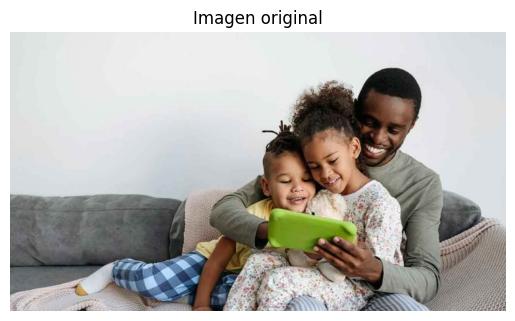

In [3]:
# Leemos una imagen desde archivo (en este caso, la foto de Messi)
#img = cv2.imread('/content/drive/MyDrive/Clases/IMAGEN/007/TEO/Imagenes/messi.jpg')

img = cv2.imread('familia-tableta_97.jpg')

# OpenCV carga en formato BGR, pero matplotlib espera RGB.
# Convertimos la imagen para mostrarla correctamente:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Imagen original')
plt.axis('off')
plt.show()


#4. Convertir a escala de grises

¿Por qué escala de grises?
El algoritmo Haar Cascade funciona sólo con imágenes en escala de grises porque las características de Haar sólo consideran intensidades, no colores.

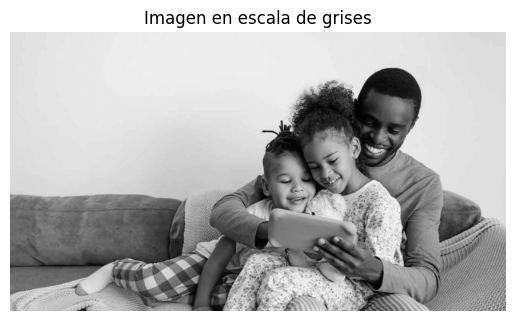

In [4]:
# Convertimos la imagen a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off')
plt.show()


#5. Descargar el clasificador Haar Cascade (si es necesario)

¿Qué es este archivo?
Es un archivo XML entrenado para detectar rostros humanos.
OpenCV lo distribuye en su repositorio, pero si no lo tenés, se puede descargar fácilmente.

In [5]:
import os

# Si el archivo no está en el directorio actual, lo descargamos de GitHub
if not os.path.exists("haarcascade_frontalface_default.xml"):
    !wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml


--2025-06-13 10:22:42--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.01s   

2025-06-13 10:22:42 (73.7 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



#6. Cargar el detector de caras

In [6]:
# Instanciamos el detector de rostros usando el archivo descargado
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")


#7. Aplicar el detector sobre la imagen

¿Cómo funciona el detector?
Recorre la imagen con una “ventana deslizante” de distintos tamaños, y evalúa cada zona con su cascada de clasificadores para decidir si hay una cara.

In [7]:
# Aplicamos el detector sobre la imagen en escala de grises
faces = face_cascade.detectMultiScale(img_gray)
# La variable faces es una lista de rectángulos: (x, y, w, h) para cada cara encontrada

print("Cantidad de caras detectadas:", len(faces))


Cantidad de caras detectadas: 2


#8. Dibujar los rectángulos sobre las caras detectadas

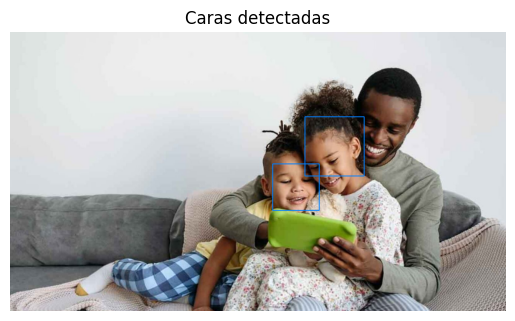

In [8]:
# Hacemos una copia de la imagen original para no modificarla directamente
img_faces = img_rgb.copy()

# Recorremos todos los rectángulos de caras detectadas
for (x, y, w, h) in faces:
    # Dibujamos un rectángulo azul sobre cada cara detectada
    cv2.rectangle(img_faces, (x, y), (x+w, y+h), (0, 128, 255), 2)

plt.imshow(img_faces)
plt.title('Caras detectadas')
plt.axis('off')
plt.show()
